# Kingston Model Parameter Dictionary

Dictionary of region-specific model parameters defined in kingston.yaml

## A note on formatting

Variable names of the form VARIABLE_NAME (upper case) are model configuration parameters. **These are the only varaibles that will be used by the simulation.**

Variable names of the form variable_name (lower_case) serve as descriptive names of intermediate variables used in deriving the above model configuration parameters. We provide these to help improve understanding of how model configuration parameters were derived when they were not taken directly from a data source.

Variables names of the form X_0 are alternate names for most intermediate variables. They were assigned by the authors of the Montreal model configuration file (cite Mila study). We have preserved them to help us construct the initial draft of this data dictionary. 

Except where noted the methods used to calculate these variables come from (cite Mila study)

## Set-up

In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
!pip install seaborn

In [4]:
!pip install pyyaml

In [5]:
!pip install git+https://github.com/QuMuLab/covi-contacts

  Cloning https://github.com/QuMuLab/covi-contacts to /tmp/pip-req-build-z63ggjml
  Running command git clone -q https://github.com/QuMuLab/covi-contacts /tmp/pip-req-build-z63ggjml
  Created wheel for covicontact: filename=covicontact-0.0.1-cp37-none-any.whl size=11836 sha256=56439177a01f97a3d85818bd174f1057932016f035bde0f39abc00c689c196c8
  Stored in directory: /tmp/pip-ephem-wheel-cache-b88n07uy/wheels/c6/08/bd/129549f49384c02a13faea290af1ae57a873baffe7556b9da0
Successfully built covicontact


In [6]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import yaml
import covicontact 

## Demographics

In [7]:
a_1 = POPULATION_SIZE_REGION = 193363

age_0_4 = 0.047
age_5_9 = 0.051
age_10_14 = 0.050
age_15_19 = 0.055
age_20_24 = 0.066
age_25_29 = 0.063
age_30_34 = 0.061
age_35_29 = 0.057
age_40_44 = 0.056
age_45_49 = 0.064
age_50_54 = 0.079
age_55_59 = 0.078
age_60_64 = 0.072
age_65_69 = 0.066
age_70_74 = 0.049

age_75_110 = round(1.0 - (
      age_0_4 
    + age_5_9 
    + age_10_14 
    + age_15_19
    + age_20_24
    + age_25_29
    + age_30_34
    + age_35_29
    + age_40_44
    + age_45_49
    + age_50_54
    + age_55_59
    + age_60_64
    + age_65_69
    + age_70_74
), 3)

P_AGE_REGION = [
    [0, 4, age_0_4],
    [5, 9, age_5_9],
    [10, 14, age_10_14],
    [15, 19, age_15_19],
    [20, 24, age_20_24],
    [25, 29, age_25_29],
    [30, 34, age_30_34],
    [35, 39, age_35_29],
    [40, 44, age_40_44],
    [45, 49, age_45_49],
    [50, 54, age_50_54],
    [55, 59, age_55_59],
    [60, 64, age_60_64],
    [65, 69, age_65_69],
    [70, 74, age_70_74],
    [75, 110, age_75_110] 
]

AVERAGE_AGE_REGION = 43.1
MEDIAN_AGE_REGION = 44.5

POPULATION_SIZE_REGION, \
AVERAGE_AGE_REGION, \
MEDIAN_AGE_REGION, \
P_AGE_REGION

(193363,
 43.1,
 44.5,
 [[0, 4, 0.047],
  [5, 9, 0.051],
  [10, 14, 0.05],
  [15, 19, 0.055],
  [20, 24, 0.066],
  [25, 29, 0.063],
  [30, 34, 0.061],
  [35, 39, 0.057],
  [40, 44, 0.056],
  [45, 49, 0.064],
  [50, 54, 0.079],
  [55, 59, 0.078],
  [60, 64, 0.072],
  [65, 69, 0.066],
  [70, 74, 0.049],
  [75, 110, 0.086]])

Data source: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page.cfm?Lang=E&Geo1=HR&Code1=3541&Geo2=PR&Code2=01&SearchText=kingston&SearchType=Contains&SearchPR=01&B1=All&TABID=1&type=0

In [8]:
assert pd.DataFrame(P_AGE_REGION, columns=("min", "max", "p"))["p"].sum() == 1.

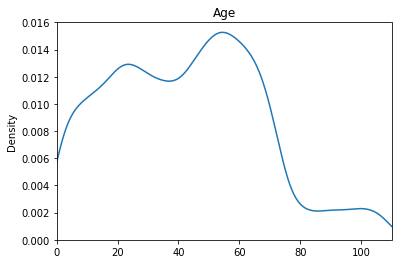

In [9]:
#from numpy.random import default_rng
df = pd.DataFrame(P_AGE_REGION, columns=("min", "max", "p"))
rng = np.random.default_rng()

age_df = pd.DataFrame(
    [rng.integers(df["min"][idx], 
              df["max"][idx]) for idx in 
    rng.choice(range(len(df)), 
           size=10000, 
           p=df["p"])])

age_df.plot.kde(title="Age", 
                         xlim=(0,110),
                         ylim=(0,0.016),
                        legend=False)

### Household composition

In [10]:
A_1 = fraction_of_all_households_that_are_1_person_households = 0.286
A_2 = fraction_of_all_households_that_are_2_person_households = 0.385
A_3 = fraction_of_all_households_that_are_3_person_households = 0.148
A_4 = fraction_of_all_households_that_are_4_person_households = 0.122
A_5 = fraction_of_all_households_that_are_5_person_households = 0.060

AVG_HOUSEHOLD_SIZE = 2.3

P_HOUSEHOLD_SIZE = [
    fraction_of_all_households_that_are_1_person_households,
    fraction_of_all_households_that_are_2_person_households,
    fraction_of_all_households_that_are_3_person_households,
    fraction_of_all_households_that_are_4_person_households,
    fraction_of_all_households_that_are_5_person_households
]

AVG_HOUSEHOLD_SIZE, \
P_HOUSEHOLD_SIZE

(2.3, [0.286, 0.385, 0.148, 0.122, 0.06])

Data source: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page.cfm?Lang=E&Geo1=HR&Code1=3541&Geo2=PR&Code2=01&SearchText=kingston&SearchType=Contains&SearchPR=01&B1=All&TABID=1&type=0

In [11]:
N_HOUSESIZE_1 = 23240
    
B_1 = total_private_households = 81350 
B_2 = one_census_family_households = 53155

C_1 = number_of_at_least_one_census_family_households = 55490
C_2 = two_person_families_in_private_households = 31630
C_2_a = fraction_of_all_households_that_are_2_person_families = (C_2 / C_1) * (B_2 / B_1)
fraction_of_all_households_that_are_size_2_and_not_2_person_families = C_2_a - A_2

C_2_1 = couples_without_children = 26135
fraction_of_all_households_that_are_couples_without_children = (C_2_1 / C_1) * (B_2 / B_1)

C_2_2 = single_parent_with_a_child = 5490
fraction_of_all_households_that_are_single_parent_with_a_child = (C_2_2 / C_2) * (B_2 / B_1)

P_FAMILY_TYPE_SIZE_2 = [
    fraction_of_all_households_that_are_couples_without_children,
    fraction_of_all_households_that_are_single_parent_with_a_child,
    0. #fraction_of_all_households_that_are_size_2_and_not_2_person_families,
]


C_3 = three_person_families_in_private_households = 11165
C_3_a = fraction_of_all_households_that_are_3_person_families = (C_3 / C_1) * (B_2 / B_1)
fraction_of_all_households_that_are_of_size_3_and_not_3_person_families = (C_3_a - A_3)

C_3_1 = couples_with_1_child = 8710
fraction_of_all_households_that_are_couples_with_1_child = (C_3_1 / C_1) * (B_2 / B_1)

C_3_2 = single_parent_with_2_children = 2455
fraction_of_all_households_that_are_single_parent_with_2_children = (C_3_2 / C_1) * (B_2 / B_1)

P_FAMILY_TYPE_SIZE_3 = [
    fraction_of_all_households_that_are_couples_with_1_child,
    fraction_of_all_households_that_are_single_parent_with_2_children,
    0. #fraction_of_all_households_that_are_of_size_3_and_not_3_person_families,
]


C_4 = four_person_families_in_private_households = 9250
C_4_a = fraction_of_all_households_that_are_4_person_families = (C_4 / C_1) * (B_2 / B_1)
fraction_of_all_households_that_are_of_size_4_and_not_4_person_families = (C_4_a - A_4)

C_4_1 = couples_of_2_children = 8635
C_4_1_a = fraction_of_all_households_that_are_couples_with_2_children = (C_4_1 / C_1) * (B_2 / B_1)

C_4_2 = single_parent_with_3_or_more_children = 780
C_4_3 = single_parent_with_3_children = (C_4 - C_4_1)
fraction_of_all_households_that_are_single_parent_with_3_children = (C_4_3 / C_1) * (B_2 / B_1)

P_FAMILY_TYPE_SIZE_4 = [
    fraction_of_all_households_that_are_couples_with_2_children,
    fraction_of_all_households_that_are_single_parent_with_3_children,
    0. #fraction_of_all_households_that_are_of_size_4_and_not_4_person_families,
]


C_5 = five_person_families_in_private_households = 3450
C_5_a = fraction_of_all_households_that_are_5_person_families = (C_5 / C_1) * (B_2 / B_1)
fraction_of_all_households_that_are_of_size_more_than_5_and_not_more_than_5_person_families = (C_5_a - A_5)

C_5_1 = couples_with_3_or_more_children = 3285
fraction_of_all_households_that_are_couples_with_3_or_more_children = (C_5_1 / C_1) * (B_2 / B_1)

C_5_2 = single_parent_with_4_or_more_children = (C_4_2 - C_4_3)
fraction_of_all_households_that_are_single_parent_with_4_or_more_children = (C_5_2 / C_1) * (B_2 / B_1)

P_FAMILY_TYPE_SIZE_MORE_THAN_5 = [
    fraction_of_all_households_that_are_couples_with_3_or_more_children,
    fraction_of_all_households_that_are_single_parent_with_4_or_more_children,
    0. #fraction_of_all_households_that_are_of_size_more_than_5_and_not_more_than_5_person_families,
]


N_HOUSESIZE_1, \
P_FAMILY_TYPE_SIZE_2, \
P_FAMILY_TYPE_SIZE_3, \
P_FAMILY_TYPE_SIZE_4, \
P_FAMILY_TYPE_SIZE_MORE_THAN_5

(23240,
 [0.3077473662314278, 0.1134121850273629, 0.0],
 [0.10256282991680643, 0.02890835217517334, 0.0],
 [0.10167968270167894, 0.007241807164045461, 0.0],
 [0.038681848022584286, 0.0019429238732804894, 0.0])

Data source: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page.cfm?Lang=E&Geo1=HR&Code1=3541&Geo2=PR&Code2=01&SearchText=kingston&SearchType=Contains&SearchPR=01&B1=All&TABID=1&type=0

In [12]:
D_1 = total_private_households = 53520
D_2 = multi_generational_households = 975
D_3 = scaled_multi_generational_households = B_1 * D_2 / D_1
other_census_family_households = 1760
non_census_family_households = 3135
D_4 = total_non_one_census_family_households = other_census_family_households + non_census_family_households
D_5 = scaled_D_4 = B_1 * D_4 / D_1

P_MULTIGENERATIONAL_FAMILY = D_3 / D_1
P_MULTIGENERTIONAL_FAMILY_GIVEN_OTHER_HOUSEHOLDS = D_3 / (D_3 + D_5)  # Mispelling needs to be fixed in original code base

P_MULTIGENERATIONAL_FAMILY, \
P_MULTIGENERTIONAL_FAMILY_GIVEN_OTHER_HOUSEHOLDS 

(0.027690446805016523, 0.16609880749574107)

Data source: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/hlt-fst/fam/Table.cfm?Lang=E&T=24&Geo=00&SO=18D

In [13]:
E = total_population = 193363

Data source: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page.cfm?Lang=E&Geo1=HR&Code1=3541&Geo2=PR&Code2=01&SearchText=KINGSTON&SearchType=Contains&SearchPR=01&B1=All&TABID=1&type=0

In [14]:
E_1 = N_COLLECTIVE_RESIDENTS = total_population_living_in_collectives_for_seinors_2011 = 2380
E_2 = N_COLLECTIVE_RESIDENTS_65_79 = total_population_aged_0_79_living_in_collectives_for_seniors = 570
E_3 = N_COLLECTIVE_RESIDENTS_80_above = total_population_aged_80_or_agove_living_in_collectives_for_seniors = 1810

Data source: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/covid19/table2-eng.cfm?geo=A0002&S=1&O=A

Used in prioritizing the allocation of houses so that no housing only has children as residents

In [15]:
MAX_AGE_CHILDREN = 14

Data source: None

Used in expanding the search for census family households and restricting the age of parents in multigenerational family

In [16]:
MAX_AGE_WITH_PARENT = 54

Data source: None

Used in sampling for parents

In [17]:
AGE_DIFFERENCE_BETWEEN_PARENT_AND_KID = 20 

Data source: None

## Location data

### Senior residences

In [18]:
number_of_private_senior_residences = 203
number_of_public_senior_residences = 60 
F_1 = number_of_private_senior_residences + number_of_public_senior_residences
N_RESIDENTS_PER_COLLECTIVE = E_1 / F_1

Data source: ?

### Workplaces

this type of location is used to model uniform interactions with colleagues
We use NAICS code 54 - Professional, Scientific and Technical Services to represent a typical workplace distribution.

In [19]:
G_1 = population_of_ontario = 14789778

Data source: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901

In [20]:
G_2 = number_of_employers = 64959
G_2_1 = number_of_employers_with_1_4_employees_in_ontario = 50166
G_2_1_a = number_of_employers_with_1_4_employees_in_kingston = G_2_1 * a_1 / G_1
G_2_2 = number_of_employers_with_5_99_employees = 14188
G_2_1_b = number_of_employers_with_5_99_employees_in_kingston = G_2_2 * a_1 / G_1
G_2_3 = number_of_employers_with_100_499_employees = 527
G_2_1_c = number_of_employers_with_100_499_employees_in_kingston = G_2_3 * a_1 / G_1
G_2_4 = number_of_employers_wtih_500_or_more_employees = 78
G_2_1_d = number_of_employers_with_500_or_more_employees_in_kingston = G_2_4 * a_1 / G_1
G_2_a = number_of_employers_in_montreal = G_2 * a_1 / G_1
P_EMPLOYEES_1_4_PER_WORKPLACE = G_2_1_a / G_2_a
P_EMPLOYEES_5_99_PER_WORKPLACE = G_2_1_b / G_2_a
P_EMPLOYEES_100_499_PER_WORKPLACE = G_2_1_c / G_2_a
P_EMPLOYEES_500_above_PER_WORKPLACE = G_2_1_d / G_2_a
AVERAGE_N_EMPLOYEES_PER_WORKPLACE = ((1+4)/2 * number_of_employers_with_1_4_employees_in_kingston \
    + (5+99)/2 * number_of_employers_with_5_99_employees_in_kingston \
    + (100+499)/2 * number_of_employers_with_100_499_employees_in_kingston \
    + 500 * number_of_employers_with_500_or_more_employees_in_kingston \
                                    ) / number_of_employers
P_EMPLOYEES_1_4_PER_WORKPLACE, \
P_EMPLOYEES_5_99_PER_WORKPLACE, \
P_EMPLOYEES_100_499_PER_WORKPLACE, \
P_EMPLOYEES_500_above_PER_WORKPLACE, \
AVERAGE_N_EMPLOYEES_PER_WORKPLACE

(0.7722717406364015,
 0.21841469234440186,
 0.008112809618374668,
 0.001200757400822057,
 0.21334846469491253)

Data source: https://www.ic.gc.ca/app/scr/app/cis/businesses-entreprises/54

### Stores

There are two types of interactions at these locations - among the workers (like a normal workplace above), and one to many (customer facing)
We use NAICS code 445 - Food and Beverage Stores  to represent a typical store

In [21]:
GS_2 = number_of_employers = 8929
GS_2_1 = number_of_employers_with_1_4_employees_in_ontario = 3225
GS_2_1_a = number_of_employers_with_1_4_employees_in_kingston = GS_2_1 * a_1 / G_1
GS_2_2 = number_of_employers_with_5_99_employees = 5159
GS_2_1_b = number_of_employers_with_5_99_employees_in_kingston = GS_2_2 * a_1 / G_1
GS_2_3 = number_of_employers_with_100_499_employees = 534
GS_2_1_c = number_of_employers_with_100_499_employees_in_kingston = GS_2_3 * a_1 / G_1
GS_2_4 = number_of_employers_wtih_500_or_more_employees = 11
GS_2_1_d = number_of_employers_with_500_or_more_employees_in_kingston = GS_2_4 * a_1 / G_1
GS_2_a = number_of_employers_in_montreal = GS_2 * a_1 / G_1
P_EMPLOYEES_1_4_PER_STORE = GS_2_1_a / GS_2_a
P_EMPLOYEES_5_99_PER_STORE = GS_2_1_b / GS_2_a
P_EMPLOYEES_100_499_PER_STORE = GS_2_1_c / GS_2_a
P_EMPLOYEES_500_above_PER_STORE = GS_2_1_d / GS_2_a
AVERAGE_N_EMPLOYEES_PER_STORE = ((1+4)/2 * number_of_employers_with_1_4_employees_in_kingston \
    + (5+99)/2 * number_of_employers_with_5_99_employees_in_kingston \
    + (100+499)/2 * number_of_employers_with_100_499_employees_in_kingston \
    + 500 * number_of_employers_with_500_or_more_employees_in_kingston \
                                    ) / number_of_employers
N_STORE_PER_1K_PEOPLE = 1000 * GS_2_a / a_1
P_EMPLOYEES_1_4_PER_STORE, \
P_EMPLOYEES_5_99_PER_STORE, \
P_EMPLOYEES_100_499_PER_STORE, \
P_EMPLOYEES_500_above_PER_STORE, \
AVERAGE_N_EMPLOYEES_PER_STORE, \
N_STORE_PER_1K_PEOPLE

(0.36118266323216486,
 0.5777802665472058,
 0.05980512935379102,
 0.0012319408668383918,
 0.6468427689131135,
 0.6037277909107223)

Data source: https://www.ic.gc.ca/app/scr/app/cis/businesses-entreprises/445

### Leisure activites

There are two types of interactions at these locations - among the workers (like a normal workplace above), and one to many (customer facing)
We use NAICS code 722 - Food Services and Drinking Places to represent a typical entertainment place


In [22]:
GM_2 = number_of_employers = 27550
GM_2_1 = number_of_employers_with_1_4_employees_in_ontario = 6878
GM_2_1_a = number_of_employers_with_1_4_employees_in_kingston = GM_2_1 * a_1 / G_1
GM_2_2 = number_of_employers_with_5_99_employees = 20272
GM_2_1_b = number_of_employers_with_5_99_employees_in_kingston = GM_2_2 * a_1 / G_1
GM_2_3 = number_of_employers_with_100_499_employees = 383
GM_2_1_c = number_of_employers_with_100_499_employees_in_kingston = GM_2_3 * a_1 / G_1
GM_2_4 = number_of_employers_wtih_500_or_more_employees = 17
GM_2_1_d = number_of_employers_with_500_or_more_employees_in_kingston = GM_2_4 * a_1 / G_1
GM_2_a = number_of_employers_in_montreal = GM_2 * a_1 / G_1
P_EMPLOYEES_1_4_PER_MISC = GM_2_1_a / GM_2_a
P_EMPLOYEES_5_99_PER_MISC = GM_2_1_b / GM_2_a
P_EMPLOYEES_100_499_PER_MISC = GM_2_1_c / GM_2_a
P_EMPLOYEES_500_above_PER_MISC = GM_2_1_d / GM_2_a
AVERAGE_N_EMPLOYEES_PER_MISC = ((1+4)/2 * number_of_employers_with_1_4_employees_in_kingston \
    + (5+99)/2 * number_of_employers_with_5_99_employees_in_kingston \
    + (100+499)/2 * number_of_employers_with_100_499_employees_in_kingston \
    + 500 * number_of_employers_with_500_or_more_employees_in_kingston \
                                    ) / number_of_employers
N_MISC_PER_1K_PEOPLE = 1000 * GM_2_a / a_1
P_EMPLOYEES_1_4_PER_MISC, \
P_EMPLOYEES_5_99_PER_MISC, \
P_EMPLOYEES_100_499_PER_MISC, \
P_EMPLOYEES_500_above_PER_MISC, \
AVERAGE_N_EMPLOYEES_PER_MISC, \
N_MISC_PER_1K_PEOPLE

(0.2496551724137931,
 0.7358257713248639,
 0.013901996370235934,
 0.000617059891107078,
 0.5668831403876288,
 1.8627730585273155)

Data source: https://www.ic.gc.ca/app/scr/app/cis/businesses-entreprises/722

## Schools

(assumption) 100% enrolment in schools for children aged 5-15 yo
Allocation of children to schools is done in the age groups of 5-9 and 10-14 for simplification
preschools & primary schools are for children aged 5-12 yo
secondary schools are for children aged 13-17 yo

In [23]:
H_1 = preschools = 393
H_2 = population_aged_4_5 = 0.057 / 5 * a_1
N_STUDENTS_PER_SCHOOL_4_5 = H_2 / H_1
H_3 = primary_schools = 417
H_4 = population_aged_5_12 = (0.054 + 3 * 0.047 / 5) * a_1
N_STUDENTS_PER_SCHOOL_5_12 = H_4 / H_3
H_5 = secondary_schools = 214
H_6 = population_aged_12_17_in_kingston = (2 * 0.047 / 5 + 3 * 0.05 / 5) * a_1
N_STUDENTS_PER_SCHOOL_12_17 = H_6 / H_5
universities = 8
college = 131
adult_education = 43
H_9 = total_schools_for_17_29_yo = 182

N_STUDENTS_PER_SCHOOL_4_5, \
N_STUDENTS_PER_SCHOOL_5_12, \
N_STUDENTS_PER_SCHOOL_12_17

(5.6090030534351145, 38.116159712230214, 44.0939925233645)

Data source: ?

In [24]:
N_STUDENTS_PER_SCHOOL_2_4 = 15 

Data source: None

In [25]:
census_subdivision_age_15_19 = 0.055
census_subdivision_age_20_24 = 0.077
census_subdivision_age_25_29 = 0.074
province_age_15_19 = 0.06
province_age_20_24 = 0.067
province_age_25_29 = 0.065
H_8_a = P_SCHOOL_FOR_AGE_17_19 = proportion_of_population_aged_15_19_in_school_census_division = 0.812 
H_8_b = P_SCHOOL_FOR_AGE_19_24 = proportion_of_population_aged_20_24_in_school_census_division = 0.465
H_8_c = P_SCHOOL_FOR_AGE_25_29 = proportion_of_population_aged_25_29_in_school_census_divisioncensus_division = 0.161
H_8_d = proportion_of_population_aged_15_19_in_school_province = H_8_a * census_subdivision_age_15_19 / province_age_15_19
H_8_e = proportion_of_population_aged_20_24_in_school_province = H_8_b * census_subdivision_age_20_24 / province_age_20_24
H_8_f = proportion_of_population_aged_25_29_in_school_province = H_8_c * census_subdivision_age_25_29 / province_age_25_29
H_8_e = proportion_of_population_aged_15_29_in_school_province = (H_8_d * 0.05/2 + H_8_e * 0.072 + H_8_f * 0.079) * a_1 
N_STUDENTS_PER_SCHOOL_17_29 = H_8_e / H_9
N_STUDENTS_PER_SCHOOL_4_5, \
N_STUDENTS_PER_SCHOOL_5_12, \
N_STUDENTS_PER_SCHOOL_12_17, \
N_STUDENTS_PER_SCHOOL_17_29

(5.6090030534351145, 38.116159712230214, 44.0939925233645, 76.03356200132178)

Data source: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page.cfm?Lang=E&Geo1=PR&Code1=24&Geo2=CSD&Code2=2466023&SearchText=Montreal&SearchType=Begins&SearchPR=01&B1=All&TABID=1&type=1


In [26]:
STUDENT_TEACHER_RATIO_SCHOOL_2_4 = 5
STUDENT_TEACHER_RATIO_SCHOOL_4_5 = 5
STUDENT_TEACHER_RATIO_SCHOOL_5_12 = 5
STUDENT_TEACHER_RATIO_SCHOOL_12_17 = 10
STUDENT_TEACHER_RATIO_SCHOOL_17_29 = 15 
P_STUDENT_4_5: 1 # proportion of children 4-5 yo who are enrolled in a preschool.
P_STUDENT_2_4: 0.5 #

Data source: None

## Hopsitals
in modeling interactions between patients, doctors, and nurses we only care about number of wards or clinics.

In [27]:
I_1 = number_of_hospitals_in_province = 170
I_2 = number_of_hospitals_in_census_division = a_1 * I_1 / G_1
N_HOSPITALS_PER_100K_PEOPLE = I_2 * a_1 / 100000

Data source: None

In [28]:
HOSPITAL_BEDS_OCCUPANCY = 0.66
HOSPITAL_BEDS_PER_1K_PEOPOLE = 2.8

Data source: # https://www.cdc.gov/nchs/data/hus/2017/089.pdf

In [29]:
ICU_BEDS_PER_1K_PEOPLE = 0.32
ICU_BEDS_OCCUPANCY = 0.68

Data source: https://www.sccm.org/Communications/Critical-Care-Statistics

## Occupations

In [30]:
O_1 = total_labor_force = 85200

Data source: Statistics Canada. Table 14-10-0385-01  Labour force characteristics, annual (x 1,000), https://doi.org/10.25318/1410038501-eng

In [31]:
O_2 = total_labor_force_healthcare = 259490
P_HEALTHCARE_WORKERS = O_2 / O_1

Data soure: ?

In [32]:
N_DOCTOR_PER_100K_PEOPLE = 127
number_of_nurses_per_100K_people = 825
NURSE_TO_DOCTOR_RATIO = number_of_nurses_per_100K_people / N_DOCTOR_PER_100K_PEOPLE
RESIDENT_TO_STAFF_RATIO = 13

Data source: https://www150.statcan.gc.ca/n1/pub/91-550-x/2008001/t022-eng.htm

In [33]:
MIN_AGE_HEALTHCARE_WORKER = 30
MAX_AGE_HEALTHCARE_WORKER = 65
MIN_WORKING_AGE = 15
MAX_WORKING_AGE = 65

Data source: None

## Mobility

- CAUTION 1: Use an upper limit of one of the bins in utils.constants.AGE_BIN_WIDTH_5 to be consistent with household allocation
- CAUTION 2: Too high a value of this parameter might break the mobility_planner.

In [34]:
MAX_AGE_CHILDREN_WITHOUT_PARENT_SUPERVISION = 14

Data source: None

### How often people go out to food stores?
This is needed to decide the time when a human visits a store

In [35]:
daily = 0.014
every_other_day = 0.123
weekly = 0.623
every_10_days = 0.108
every_15_days = 0.094
every_30_days = 0.038
P_GROCERY_SHOPPING_DAYS: [
  [1, daily],
  [2, every_other_day],
  [7, weekly],
  [10, every_10_days],
  [15, every_15_days],
  [30, every_30_days]
]

Data source: https://www.statista.com/statistics/944310/how-often-consumers-visit-food-stores-canada/

### How often do people socialize?

In [36]:
daily = 0.16
weekly = 0.47
every_10_days = 0.28
every_30_days = 0.07
every_40_days = 0.02
P_SOCIALIZE_DAYS: [
  [1, daily],
  [7, weekly],
  [10, every_10_days],
  [30, every_30_days],
  [40, every_40_days]
]

Data source: https://www150.statcan.gc.ca/n1/pub/89-652-x/89-652-x2014006-eng.htm

### How often do people exercise?

In [37]:
daily = 0.16
weekly = 0.47
every_10_days = 0.28
every_30_days = 0.07
every_40_days = 0.02
P_EXERCISE_DAYS: [
  [1, daily],
  [7, weekly],
  [10, every_10_days],
  [30, every_30_days],
  [40, every_40_days]
]

Data source: https://www150.statcan.gc.ca/n1/pub/89-652-x/89-652-x2014006-eng.htm

### How much time do people spend grocery shopping? 

Daily average time spent in hours on various activities by age group and sex, 15 years and over, Canada and provinces 15 years and over

In [38]:
AVERAGE_TIME_SPENT_GROCERY: 0.5 # hours

Data source: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=4510001401&pickMembers%5B0%5D=1.3&pickMembers%5B1%5D=3.1&pickMembers%5B2%5D=4.1&pickMembers%5B3%5D=5.1
Table  45-10-0014-01  

### How much time do people spend on socializing? 

In [39]:
AVERAGE_TIME_SPENT_SOCIALIZING: 1.0 # hours

Data source: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=4510001401&pickMembers%5B0%5D=1.3&pickMembers%5B1%5D=3.1&pickMembers%5B2%5D=4.1&pickMembers%5B3%5D=5.1  
Table  45-10-0014-01

### How much time do people spend on exercise? 

In [40]:
AVERAGE_TIME_SPENT_EXERCISING: 0.3 # hours

Data source: "Active sports", Statistics Canada. Table 45-10-0014-01  Daily average time spent in hours on various activities by age group and sex, 15 years and over, Canada and provinces, https://doi.org/10.25318/4510001401-eng

### How much time do people spend on work? 

In [41]:
AVERAGE_TIME_SPENT_WORK: 4.8 # hours

Data source: "Age 25-24", "Paid work", Statistics Canada. Table 45-10-0014-01  Daily average time spent in hours on various activities by age group and sex, 15 years and over, Canada and provinces, https://doi.org/10.25318/4510001401-eng

## Intervention related data

### Pre-confinement contacts

In [42]:
WORKPLACE_MEAN_DAILY_INTERACTIONS = 10
OTHER_MEAN_DAILY_INTERACTIONS = 3.1
HOUSEHOLD_MEAN_DAILY_INTERACTIONS = 2.7
SCHOOL_MEAN_DAILY_INTERACTIONS = 6
HOSPITAL_MEAN_DAILY_INTERACTIONS = 10

Data source: None

### Lockdown contacts

In [43]:
LOCKDOWN_FRACTION_REDUCTION_IN_CONTACTS_AT_HOUSEHOLD: 0.30
LOCKDOWN_FRACTION_REDUCTION_IN_CONTACTS_AT_WORKPLACE: 0.80
LOCKDOWN_FRACTION_REDUCTION_IN_CONTACTS_AT_OTHERS: 0.50
LOCKDOWN_FRACTION_REDUCTION_IN_CONTACTS_AT_HOSPITAL: 1.0 # no contacts

Data source: http://www.marc-brisson.net/covid19-response/Epidemiologie-et-modelisation-evolution-COVID-19-au-Quebec_29-juin.pdf

### Solo dwellers

In [44]:
population_size_country = 35151730

age_0_4 = 0.054
age_5_9 = 0.057
age_10_14 = 0.055
age_15_19 = 0.058
age_20_24 = 0.064
age_25_29 = 0.065
age_30_34 = 0.066
age_35_29 = 0.065
age_40_44 = 0.064
age_45_49 = 0.067
age_50_54 = 0.076
age_55_59 = 0.075
age_60_64 = 0.065
age_65_69 = 0.056
age_70_74 = 0.040

age_75_110 = round(1.0 - (
      age_0_4 
    + age_5_9 
    + age_10_14 
    + age_15_19
    + age_20_24
    + age_25_29
    + age_30_34
    + age_35_29
    + age_40_44
    + age_45_49
    + age_50_54
    + age_55_59
    + age_60_64
    + age_65_69
    + age_70_74
), 3)

p_age_country = [
    [0, 4, age_0_4],
    [5, 9, age_5_9],
    [10, 14, age_10_14],
    [15, 19, age_15_19],
    [20, 24, age_20_24],
    [25, 29, age_25_29],
    [30, 34, age_30_34],
    [35, 39, age_35_29],
    [40, 44, age_40_44],
    [45, 49, age_45_49],
    [50, 54, age_50_54],
    [55, 59, age_55_59],
    [60, 64, age_60_64],
    [65, 69, age_65_69],
    [70, 74, age_70_74],
    [75, 110, age_75_110] 
]

population_size_country, p_age_country

(35151730,
 [[0, 4, 0.054],
  [5, 9, 0.057],
  [10, 14, 0.055],
  [15, 19, 0.058],
  [20, 24, 0.064],
  [25, 29, 0.065],
  [30, 34, 0.066],
  [35, 39, 0.065],
  [40, 44, 0.064],
  [45, 49, 0.067],
  [50, 54, 0.076],
  [55, 59, 0.075],
  [60, 64, 0.065],
  [65, 69, 0.056],
  [70, 74, 0.04],
  [75, 110, 0.073]])

Data source: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page.cfm?Lang=E&Geo1=HR&Code1=2406&Geo2=PR&Code2=01&SearchText=montreal&SearchType=Contains&SearchPR=01&B1=All&TABID=1&type=1

In [45]:
n_age_solo_dwellers_country = [[15, 165, 175],
                               [16, 290, 255],
                               [17, 575, 565],
                               [18, 2295, 2455],
                               [19, 4970, 5350],
                               [20, 8200, 8110],
                               [21, 11475, 10490],
                               [22, 14750, 12860],
                               [23, 19080, 16120],
                               [24, 23125, 19335],
                               [25, 27570, 21790],
                               [26, 30260, 23335],
                               [27, 31540, 23595],
                               [28, 32280, 23645],
                               [29, 32820, 23335],
                               [30, 33925, 23500],
                               [31, 33485, 22935],
                               [32, 32440, 22080],
                               [33, 31005, 21050],
                               [34, 30400, 20275],
                               [35, 30130, 19555],
                               [36, 28885, 18560],
                               [37, 27270, 17315],
                               [38, 26250, 16735],
                               [39, 25990, 16470],
                               [40, 25945, 16245],
                               [41, 25455, 16250],
                               [42, 24970, 16145],
                               [43, 25245, 16500],
                               [44, 26575, 17275],
                               [45, 28670, 19140],
                               [46, 28810, 19780],
                               [47, 29270, 20130],
                               [48, 29750, 21340],
                               [49, 31390, 23075],
                               [50, 34705, 25985],
                               [51, 38485, 29365],
                               [52, 40260, 31920],
                               [53, 40715, 33960],
                               [54, 40950, 35645],
                               [55, 41520, 37890],
                               [56, 41240, 39570],
                               [57, 40590, 40605],
                               [58, 40310, 42160],
                               [59, 39600, 43585],
                               [60, 38570, 44130],
                               [61, 37850, 46145],
                               [62, 35965, 46455],
                               [63, 34570, 46255],
                               [64, 32920, 45925],
                               [65, 32435, 46535],
                               [66, 30975, 46780],
                               [67, 29965, 47915],
                               [68, 29380, 49375],
                               [69, 28745, 50500],
                               [70, 23795, 43375],
                               [71, 22365, 42385],
                               [72, 21325, 42450],
                               [73, 19845, 41795],
                               [74, 18375, 39545],
                               [75, 17225, 39055],
                               [76, 15600, 37130],
                               [77, 14975, 36700],
                               [78, 14145, 36085],
                               [79, 13340, 34345],
                               [80, 12840, 34670],
                               [81, 11855, 33210],
                               [82, 11505, 31455],
                               [83, 11215, 30955],
                               [84, 10325, 29680],
                               [85, 9725, 27805],
                               [86, 8490, 25230],
                               [87, 7345, 22045],
                               [88, 6410, 19935],
                               [89, 5460, 16790],
                               [90, 4475, 14400],
                               [91, 3630, 12025],
                               [92, 2820, 9655],
                               [93, 2200, 7410],
                               [94, 1580, 5605],
                               [95, 1130, 3800],
                               [96, 720, 2735],
                               [97, 410, 1620],
                               [98, 290, 1060],
                               [99, 175, 695],
                               [100, 100, 970]]


region_df = pd.DataFrame(P_AGE_REGION,
                        columns=('min_age',
                                 'max_age',
                                 'p'))

age_solo_df = region_df[["min_age", "max_age"]]

age_bins = pd.IntervalIndex.from_arrays(region_df['min_age'].values, 
                                        region_df['max_age'].values, 
                                        closed='both')

country_df = pd.DataFrame(n_age_solo_dwellers_country, 
                         columns=('age', 
                                  'male', 
                                  'female'))

country_df['age_bin'] = pd.cut(country_df['age'], 
                               age_bins)

country_binned_nd = country_df.groupby('age_bin').sum()[['male','female']].sum(1).values

n_nd = country_binned_nd \
            / (np.asarray(p_age_country)[:,2] \
                 * population_size_country) \
            * np.asarray(P_AGE_REGION)[:,2] \
            * POPULATION_SIZE_REGION
            
correction_factor = N_HOUSESIZE_1 / sum(n_nd)

corrected_nd = n_nd * correction_factor

age_solo_df["p"] = corrected_nd / N_HOUSESIZE_1

P_AGE_SOLO_DWELLERS_GIVEN_HOUSESIZE_1 = [[int(data['min_age']), int(data['max_age']), float(data['p'])] for _, data in age_solo_df.iterrows()]
P_AGE_SOLO_DWELLERS_GIVEN_HOUSESIZE_1


[[0, 4, 0.0],
 [5, 9, 0.0],
 [10, 14, 0.0],
 [15, 19, 0.0038419314721169205],
 [20, 24, 0.03508309054208617],
 [25, 29, 0.062059765281272064],
 [30, 34, 0.059381781169237424],
 [35, 39, 0.04721056219357152],
 [40, 44, 0.043673957156556246],
 [45, 49, 0.05690343886987511],
 [50, 54, 0.08671408333873519],
 [55, 59, 0.10033402842454901],
 [60, 64, 0.10731487011037408],
 [65, 69, 0.10966234988351678],
 [70, 74, 0.09152587407111036],
 [75, 110, 0.19629426748699896]]

Data source: https://www150.statcan.gc.ca/n1/pub/75-006-x/2019001/article/00003-eng.htm

Assumes distribution of people aged 60-79 living in collective is assumed to be skewed towards larger range [1/6, 2/6, 3/6]

In [46]:
P_COLLECTIVE = N_COLLECTIVE_RESIDENTS / POPULATION_SIZE_REGION

age_df = pd.DataFrame(P_AGE_REGION, 
                               columns=('min_age',
                                        'max_age',
                                        'p'))

P_COLLECTIVE_65_69 = 0.167 * float(age_df.loc[age_df['min_age']==65,'p'])
P_COLLECTIVE_70_74 = 2 * 0.167 * float(age_df.loc[age_df['min_age']==70,'p'])
P_COLLECTIVE_75_above = 3 * 0.167 * float(age_df.loc[age_df['min_age']>=75,'p'])

P_COLLECTIVE, \
P_COLLECTIVE_65_69, \
P_COLLECTIVE_70_74, \
P_COLLECTIVE_75_above

(0.01230845611621665, 0.011022, 0.016366000000000002, 0.043086)

Data source: None

## Adjusted contact matrices

In [47]:
population_size_country = 35151730

p_age_country = [
    [0, 4, 0.054],
    [5, 9, 0.057],
    [10, 14, 0.055],
    [15, 19, 0.058],
    [20, 24, 0.064],
    [25, 29, 0.065],
    [30, 34, 0.066],
    [35, 39, 0.065],
    [40, 44, 0.064],
    [45, 49, 0.067],
    [50, 54, 0.076],
    [55, 59, 0.075],
    [60, 64, 0.065],
    [65, 69, 0.056],
    [70, 74, 0.04],
    [75, 110, 0.073],]

Data source: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page.cfm?Lang=E&Geo1=HR&Code1=2406&Geo2=PR&Code2=01&SearchText=montreal&SearchType=Contains&SearchPR=01&B1=All&TABID=1&type=1

In [48]:
country_contact_matrix_all = np.asarray([
    [2.8708768069999997, 0.943574775, 0.373580522, 0.253171588, 0.335862006, 0.655843235, 1.034230594, 0.920042313, 0.448951204, 0.294227216, 0.312045293, 0.25033322, 0.161401078, 0.132536659, 0.07109389, 0.037908536],
    [0.865953573, 4.481639498, 0.8897866459999999, 0.252074811, 0.156427238, 0.40257765700000003, 0.76881514, 0.93100172, 0.742276142, 0.316226719, 0.210519779, 0.173823945, 0.148955173, 0.11229653099999999, 0.04629893, 0.035474223],
    [0.21203608699999998, 1.419850659, 6.675477925, 0.8012270909999999, 0.296434176, 0.252080345, 0.460804053, 0.7187821940000001, 0.963702925, 0.547955805, 0.286065157, 0.143251617, 0.090494646, 0.08989419300000001, 0.056724668, 0.047289207],
    [0.131602359, 0.311829493, 2.596952378, 10.35650746, 1.5602828659999999, 0.777386755, 0.646986463, 0.8355516820000001, 1.082847504, 1.0850058759999999, 0.55216954, 0.22582218399999998, 0.086863895, 0.06416785, 0.03185901, 0.020840003],
    [0.226273555, 0.175286487, 0.309149028, 2.5520764590000002, 4.416787448, 1.8567915380000002, 1.244935945, 1.120562518, 0.9789642190000001, 1.253775626, 0.848946917, 0.431860388, 0.116143009, 0.059121239000000006, 0.056115639, 0.044583591],
    [0.5604375970000001, 0.28378290300000003, 0.21759868, 0.878430397, 2.133436359, 3.7358193760000002, 1.9059477280000001, 1.457475082, 1.238761523, 1.049546776, 1.0108852320000001, 0.516040875, 0.15670103300000002, 0.065123849, 0.03131584, 0.022217996],
    [0.764109395, 0.8844942509999999, 0.656623282, 0.51528489, 1.075488433, 1.8244867919999999, 3.118595871, 1.898635934, 1.4509146730000002, 1.165425122, 0.8930680190000001, 0.594933536, 0.230120894, 0.10905688599999999, 0.048268108, 0.045014114],
    [0.6732571490000001, 1.013733159, 0.837523412, 0.763828339, 0.7594164809999999, 1.390934001, 1.7357379119999998, 3.0305179310000003, 1.984272024, 1.319324958, 0.9410525559999999, 0.49407920299999997, 0.262297836, 0.169478116, 0.08543297, 0.033861898],
    [0.306184381, 0.666510809, 0.982571813, 1.149015112, 0.916971003, 1.231849336, 1.586228388, 1.785873215, 2.76936616, 1.641734395, 1.132034135, 0.41105569399999997, 0.20939502399999999, 0.129525933, 0.08066805, 0.03615801],
    [0.372731374, 0.505899601, 0.747719079, 1.71647765, 0.956656191, 1.038228377, 1.293728858, 1.451938084, 1.5689073740000001, 2.2896646880000002, 1.187402041, 0.526926407, 0.188156591, 0.108693554, 0.08425313, 0.073240803],
    [0.285056825, 0.624932909, 0.992199525, 1.460810486, 1.110195146, 1.4070707930000002, 1.278359387, 1.2490689959999999, 1.642549112, 1.8830808140000002, 2.154202516, 0.9444108959999999, 0.331052203, 0.157922501, 0.094493828, 0.081724541],
    [0.519764499, 0.674308951, 0.7276224729999999, 0.956733752, 0.777544912, 1.240488113, 1.302562902, 1.017429364, 1.135226225, 1.009301037, 1.296009525, 1.773000203, 0.584442011, 0.265872342, 0.116356586, 0.08031509],
    [0.408954961, 0.372265245, 0.299667648, 0.463205924, 0.40315311, 0.6071767229999999, 0.735610489, 0.7596705, 0.613065716, 0.547411716, 0.560977013, 0.753030949, 1.249703783, 0.451641305, 0.226512425, 0.092105689],
    [0.249176197, 0.391294586, 0.32452269100000003, 0.214008642, 0.283831932, 0.395610833, 0.573462072, 0.559687251, 0.558306737, 0.378609975, 0.42924095, 0.5367087970000001, 0.5779492629999999, 1.15929008, 0.290691064, 0.12038807900000001],
    [0.099977394, 0.284923632, 0.288458405, 0.326181658, 0.159844248, 0.251233465, 0.258565579, 0.427187175, 0.536036826, 0.433180891, 0.360688206, 0.326863836, 0.5669313570000001, 0.601427513, 0.83561744, 0.245818896],
    [0.195697493, 0.252837558, 0.362628225, 0.298054162, 0.132004774, 0.160098599, 0.255237628, 0.291007437, 0.337793436, 0.40556620600000004, 0.412055089, 0.261903506, 0.19973673, 0.297519533, 0.269463595, 0.46130448700000004]
    ])

country_contact_matrix_household = [
    [0.59207246, 0.437309779, 0.20060485399999997, 0.084645457, 0.129332395, 0.291810736, 0.551087249, 0.5304143579999999, 0.19453487600000002, 0.06587368099999999, 0.054156787000000005, 0.027575468, 0.02071173, 0.007347438, 0.002824868, 0.0054440669999999995],
    [0.271954337, 0.849878569, 0.371932453, 0.11664118300000001, 0.031965086000000004, 0.139006546, 0.43088944, 0.575518365, 0.41968337899999997, 0.123986834, 0.04044783, 0.021569495, 0.010694198, 0.0072526959999999994, 0.0028726090000000004, 0.003316365],
    [0.124213326, 0.376400364, 1.359935933, 0.35318123100000004, 0.04737858599999999, 0.027110087, 0.129979962, 0.38480395100000003, 0.517710659, 0.224737183, 0.066414297, 0.016870786999999998, 0.009984205, 0.008609508, 0.006602495, 0.00350773],
    [0.058300751, 0.11478039, 0.418479855, 1.233643599, 0.18314746699999998, 0.035972346, 0.029131618999999997, 0.181945128, 0.388921759, 0.432658009, 0.195403464, 0.047836878, 0.01441562, 0.011296988, 0.0048100470000000005, 0.0026860390000000003],
    [0.123386546, 0.056612326, 0.076434389, 0.387866001, 1.285891289, 0.21835536100000003, 0.047626141, 0.021712767, 0.136269384, 0.42424875700000003, 0.25711594, 0.111626365, 0.01851624, 0.0039383740000000006, 0.004178502, 0.003365332],
    [0.39648599100000004, 0.137084966, 0.03484128, 0.069129695, 0.237529518, 1.1129284240000001, 0.22538050199999998, 0.032172141, 0.015585366000000002, 0.06926368299999999, 0.193781029, 0.11245563900000001, 0.042852145999999994, 0.008592863000000001, 0.001126674, 0.005783779],
    [0.56977288, 0.528767211, 0.21945194, 0.038817963999999996, 0.055204844, 0.20888226399999998, 1.0208797790000002, 0.221001079, 0.073918949, 0.017836569, 0.034256284, 0.056715095, 0.055305952, 0.008412366999999999, 0.004017403, 0.003439471],
    [0.46507425, 0.7116587459999999, 0.544765204, 0.196201037, 0.023614452999999997, 0.02906543, 0.151100265, 0.998725998, 0.171509881, 0.036780837999999996, 0.021203821, 0.014378913, 0.027006431, 0.014675754, 0.0065217240000000004, 0.002284622],
    [0.18680190600000002, 0.45701152700000003, 0.6469531070000001, 0.41765280899999996, 0.089305442, 0.022336957, 0.070274118, 0.17099647699999998, 0.8111023270000001, 0.136314517, 0.032235217000000004, 0.005239985999999999, 0.018482846, 0.02060502, 0.00830287, 0.005254925],
    [0.107773848, 0.23984711600000003, 0.43649676200000004, 0.642946815, 0.34514044299999996, 0.070086352, 0.026159709, 0.080565731, 0.16944635100000002, 0.845173944, 0.145544374, 0.0293007, 0.010896476, 0.0084787, 0.007277261, 0.01314087],
    [0.167731166, 0.144562024, 0.284504852, 0.411182231, 0.391716309, 0.230472414, 0.081546221, 0.04713413599999999, 0.085325635, 0.19467561100000003, 0.8398589870000001, 0.156320312, 0.028782548999999998, 0.007382044, 0.00745129, 0.022385776],
    [0.254255594, 0.250673324, 0.182658419, 0.284031309, 0.282951453, 0.32476212600000004, 0.238604641, 0.070653382, 0.035273332000000004, 0.12530154400000001, 0.238763792, 0.90169075, 0.15791, 0.039608934, 0.005568105, 0.019148535],
    [0.270744266, 0.23919891, 0.17566543899999998, 0.155203926, 0.115594636, 0.169876024, 0.247154102, 0.160283221, 0.08466924199999999, 0.039774323, 0.089620325, 0.198588495, 0.7868008120000001, 0.10685338400000001, 0.021476868, 0.005091569000000001],
    [0.189086642, 0.287945319, 0.265412699, 0.15590489800000001, 0.097571172, 0.10383381300000001, 0.179743923, 0.221963293, 0.221093243, 0.066723828, 0.059569370999999996, 0.09497989400000001, 0.151664111, 0.7555136709999999, 0.100022895, 0.012063913],
    [0.08091944200000001, 0.244292945, 0.23012275399999998, 0.195503714, 0.035831918, 0.069166739, 0.063660882, 0.155759136, 0.204319571, 0.131690119, 0.073663737, 0.036298245, 0.101130049, 0.155396162, 0.473538742, 0.093856236],
    [0.165964116, 0.201260347, 0.317853845, 0.248791443, 0.065459929, 0.06305388599999999, 0.078772998, 0.153222065, 0.20002873399999999, 0.20939867899999998, 0.254929205, 0.09963826199999999, 0.040888659, 0.07279628099999999, 0.09777384900000001, 0.343519594]
    ]

country_contact_matrix_other = [
    [0.558478194, 0.24307632199999998, 0.12396492699999999, 0.103516869, 0.19019765, 0.292437985, 0.35124117299999996, 0.293095338, 0.20809803100000002, 0.169254118, 0.22466226399999997, 0.200705484, 0.13784388, 0.12421723900000001, 0.068256964, 0.032464468999999996],
    [0.264672948, 1.002351092, 0.366096114, 0.11479777, 0.105669899, 0.211133915, 0.267901352, 0.289390665, 0.25668134, 0.141612304, 0.12453300699999999, 0.138079365, 0.13267565, 0.103685899, 0.043078461, 0.032157859],
    [0.08498470300000001, 0.45427943200000004, 1.601413762, 0.282959165, 0.203412581, 0.173192815, 0.20778257100000003, 0.241607685, 0.29254368399999997, 0.213405505, 0.15396875699999998, 0.102449813, 0.07438276, 0.080578368, 0.050117216, 0.043599081],
    [0.052453857, 0.166020085, 0.769864771, 2.609966333, 0.6867416409999999, 0.323384973, 0.21285106199999998, 0.24782123399999997, 0.26611267, 0.271763731, 0.134741552, 0.071597544, 0.054292165999999996, 0.051765555, 0.027046103, 0.018153963999999998],
    [0.080934795, 0.10364832199999999, 0.154003214, 1.121077802, 1.970451175, 0.7841954520000001, 0.482962933, 0.311960096, 0.254382648, 0.34065508, 0.227203606, 0.161010771, 0.067016065, 0.05393450599999999, 0.051746622, 0.041214516],
    [0.14084866599999998, 0.073618522, 0.066051035, 0.291895453, 0.886307132, 1.1386976359999998, 0.672926811, 0.43818270000000004, 0.30720765899999997, 0.319389585, 0.296502312, 0.17011946600000002, 0.069337364, 0.054126898, 0.02971565, 0.015144463],
    [0.14787039, 0.10567399400000001, 0.159971692, 0.14415187699999998, 0.4148239, 0.614009414, 0.8003391590000001, 0.5556664020000001, 0.366649124, 0.321676499, 0.35833299, 0.276738732, 0.13103726400000001, 0.100182344, 0.044246602999999995, 0.041571147999999995],
    [0.130491031, 0.15465314, 0.11609487199999999, 0.09714053199999999, 0.251506671, 0.444430831, 0.578064675, 0.684859454, 0.5007091029999999, 0.369021696, 0.276272285, 0.234301455, 0.208152345, 0.152691581, 0.078902111, 0.031571254],
    [0.093658096, 0.122201441, 0.190800393, 0.138507123, 0.270226898, 0.326679877, 0.468620869, 0.492418019, 0.560019533, 0.391619299, 0.295114888, 0.148545581, 0.145558706, 0.10841938400000001, 0.072354908, 0.030890135],
    [0.032492917999999996, 0.053706690999999994, 0.069722652, 0.15027522599999998, 0.224516728, 0.280595341, 0.357635055, 0.38849394299999995, 0.390818066, 0.45997959999999993, 0.393105298, 0.19258921199999998, 0.14168903900000002, 0.098443789, 0.076965045, 0.060093840999999995],
    [0.056759015, 0.107115469, 0.121183167, 0.203582067, 0.40410813700000003, 0.516463246, 0.393364372, 0.371049281, 0.44025334200000005, 0.564738639, 0.487219991, 0.41309540100000003, 0.25968784699999997, 0.15052864900000001, 0.087030715, 0.059328603],
    [0.082683835, 0.07398121099999999, 0.079315833, 0.106381549, 0.28956333100000003, 0.491411913, 0.529255693, 0.42703121299999997, 0.43762524399999997, 0.354170014, 0.570816066, 0.570322478, 0.38197852, 0.22624991100000003, 0.10999898699999999, 0.060396679],
    [0.057486913, 0.063212612, 0.054216022999999995, 0.09734347199999999, 0.222998613, 0.34550772799999996, 0.370601616, 0.431945739, 0.39056660600000004, 0.363186135, 0.36096618399999997, 0.47873993, 0.43069834100000004, 0.333244742, 0.20502729600000003, 0.08699928],
    [0.057986875, 0.077092196, 0.04881948, 0.058080982, 0.184286005, 0.289792662, 0.38126108700000005, 0.33226772600000004, 0.33163014, 0.30280342600000004, 0.367527053, 0.42591740100000003, 0.41781722, 0.386248435, 0.179518016, 0.108312255],
    [0.019057951, 0.040630687, 0.058333103, 0.123027959, 0.123995526, 0.182045481, 0.19486897, 0.263760702, 0.32382445600000004, 0.28028084, 0.251740262, 0.269058643, 0.458030261, 0.438000273, 0.35414917700000004, 0.130553955],
    [0.029733376000000002, 0.030421131, 0.04477438, 0.027954766000000002, 0.066498244, 0.089400892, 0.17641769899999998, 0.13770115300000002, 0.137736924, 0.196157198, 0.157115203, 0.162265244, 0.158848071, 0.22471296899999998, 0.171689746, 0.117784893]
    ]

country_contact_matrix_school = [
    [1.720326153, 0.263188673, 0.049010741, 0.065009262, 0.016331961000000002, 0.071594514, 0.13190217099999998, 0.09653261699999999, 0.046318297, 0.059099415999999995, 0.033226242999999996, 0.022052268, 0.002845468, 0.0009719819999999999, 8.267049999999999e-66, 6.397899999999998e-120],
    [0.329326288, 2.629409837, 0.151758079, 0.020635858, 0.018792252, 0.052437195, 0.070024348, 0.06609269, 0.065911423, 0.050627581, 0.045538942, 0.014175086000000002, 0.005585324, 0.001344441, 0.00034786, 8.099519999999999e-39],
    [0.002838058, 0.589170863, 3.547631188, 0.135257141, 0.012433386000000001, 0.042196965999999995, 0.04396927900000001, 0.069930652, 0.075085804, 0.063508614, 0.047526646, 0.023930975, 0.006127680999999999, 0.000706318, 4.94403e-25, 0.00018239599999999998],
    [0.020847751, 0.031029018, 1.355440971, 5.758961349, 0.060482901, 0.056833317, 0.064960815, 0.091022138, 0.078940523, 0.100811317, 0.05934091, 0.034885527, 0.00776429, 0.00109696, 6.2274e-33, 1.7110099999999998e-70],
    [0.021952213999999998, 0.015025839, 0.006161766999999999, 0.6185781579999999, 0.303611839, 0.035490889, 0.024263582000000002, 0.029754224, 0.019569348, 0.025535585, 0.014320046000000001, 0.010150281, 0.000770819, 0.001238497, 0.000177254, 1.2202e-47],
    [0.023102941000000002, 0.073079415, 0.023678163, 0.145336476, 0.196584609, 0.11912644800000001, 0.021203161, 0.028076284, 0.034477462, 0.032252726, 0.008923289000000001, 0.014507743, 0.004827371, 0.00238802, 0.000463398, 0.00128674],
    [0.046466125, 0.250053046, 0.17075413899999997, 0.129261401, 0.03655774, 0.06636605799999999, 0.061408295999999994, 0.042599704, 0.047970679, 0.026692159, 0.023122793, 0.0035066159999999997, 0.006252586, 0.000445796, 1.65556e-48, 3.1139399999999995e-55],
    [0.077691868, 0.14742127300000002, 0.111479196, 0.067182609, 0.014359828, 0.042709643, 0.060654114, 0.045331418, 0.052225695, 0.02671572, 0.004205597, 0.009759383, 0.000656691, 0.002098482, 1.8456999999999996e-123, 9.702489999999998e-67],
    [0.025724379, 0.08729784, 0.07153393200000001, 0.342253984, 0.007124826999999999, 0.022109392000000002, 0.022104957, 0.029907842999999996, 0.066533359, 0.025380911000000003, 0.030067361, 0.008354762, 0.006719723, 0.000487167, 4.816639999999999e-68, 2.4042899999999995e-92],
    [0.23246460800000002, 0.21234579399999998, 0.142041645, 0.604625182, 0.0054851480000000005, 0.029396644, 0.057760177999999995, 0.049924431, 0.048363832999999995, 0.031189703, 0.040704994, 0.018462956000000003, 0.004270368, 0.001754785, 6.217199999999998e-134, 3.27654e-72],
    [0.060566644, 0.373255416, 0.482021524, 0.6144722770000001, 0.005810679, 0.015837248999999998, 0.04500119, 0.04440954, 0.057414093, 0.08408022300000001, 0.045077107000000005, 0.023584907999999998, 0.006234157, 9.428699999999999e-24, 1.2397999999999995e-117, 5.649359999999999e-78],
    [0.18282507, 0.349654416, 0.312043232, 0.41785349299999996, 0.006676893000000001, 0.060543797999999996, 0.023931356, 0.04016937, 0.052360024000000005, 0.040385862, 0.037109259, 0.04057508, 0.011840736000000001, 1.19739e-31, 0.000782907, 0.000763219],
    [0.08072378200000001, 0.06985372299999999, 0.036520791000000004, 0.19774354800000002, 0.013983291, 0.0019118870000000001, 0.017866404, 0.049770667000000005, 0.011243913000000001, 0.01872131, 0.015267728999999999, 0.007694163, 0.025006207000000003, 0.011522876999999999, 4.426079999999999e-67, 2.122e-37],
    [0.0020950770000000003, 0.026253707, 0.010282863, 7.743389999999999e-32, 0.001943262, 0.0019054279999999998, 0.01238464, 0.005427057, 0.005517168, 0.009023152, 0.002067455, 0.015758433, 0.008421329, 0.017513811, 0.011125246, 3.457299999999999e-126],
    [1.2857e-28, 5.11664e-26, 1.93277e-40, 0.007623919, 2.63721e-22, 1.69852e-24, 1.25963e-26, 0.0076271, 0.007857159, 0.021178954, 0.035262902, 0.021461976, 0.007744909, 0.008014252, 0.007912869, 0.021382622],
    [2.8247799999999995e-94, 0.021156081, 8.47688e-42, 0.021307952999999998, 4.900519999999999e-36, 0.007596854, 9.778899999999997e-69, 2.2326799999999996e-60, 1.43834e-48, 8.569469999999998e-60, 4.70029e-42, 1.5997999999999997e-46, 2.2111499999999993e-83, 8.859499999999997e-107, 1.0204299999999997e-80, 6.614099999999998e-113]
    ]
        
country_contact_matrix_work = [
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.206049999999998e-92, 1.20585e-05, 3.1643999999999994e-125],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.34956e-05, 7.645909999999999e-79, 2.38392e-65],
    [0.0, 0.0, 0.16649704199999998, 0.029829555, 0.033209623, 0.009580478, 0.07907224, 0.022439906000000003, 0.078362778, 0.046304503, 0.018155458, 4.141690000000001e-08, 3.11895e-17, 2.7978e-53, 4.95801e-06, 3.7772e-102],
    [0.0, 0.0, 0.053166780999999996, 0.753936178, 0.629910858, 0.361196119, 0.34004296700000003, 0.314763181, 0.348872553, 0.27977282, 0.162683613, 0.071502235, 0.010391818, 8.347e-06, 2.8597300000000003e-06, 1.88926e-31],
    [0.0, 0.0, 0.072549658, 0.42455449700000003, 0.856833145, 0.818749836, 0.690083288, 0.757135432, 0.5687428379999999, 0.463336204, 0.350307325, 0.149072972, 0.029839886, 9.86113e-06, 1.3260899999999999e-05, 3.7431800000000003e-06],
    [0.0, 0.0, 0.09302820199999999, 0.37206877200000005, 0.813015101, 1.3650668680000002, 0.986437255, 0.959043957, 0.8814910359999999, 0.6286407829999999, 0.511678603, 0.218958027, 0.039684151, 1.60675e-05, 1.0118300000000001e-05, 3.01443e-06],
    [0.0, 0.0, 0.10644551099999999, 0.20305364899999997, 0.56890195, 0.935229055, 1.235968636, 1.0793687490000001, 0.9623759209999999, 0.799219895, 0.47735595299999994, 0.257973093, 0.037525092, 1.63796e-05, 4.10101e-06, 3.4947900000000006e-06],
    [0.0, 0.0, 0.065184141, 0.403304162, 0.469935528, 0.874728097, 0.945918858, 1.30160106, 1.259827344, 0.8868067040000001, 0.639370853, 0.235639452, 0.026482369, 1.2298900000000002e-05, 9.13513e-06, 6.02097e-06],
    [0.0, 0.0, 0.073284381, 0.250601197, 0.5503138360000001, 0.86072311, 1.025228445, 1.092550876, 1.3317109409999999, 1.088419668, 0.774616669, 0.248915365, 0.038633749, 1.43626e-05, 1.02722e-05, 1.2950399999999999e-05],
    [0.0, 0.0, 0.09945802, 0.318630428, 0.38151387200000003, 0.65815004, 0.8521739159999999, 0.9329539790000001, 0.960279125, 0.95332144, 0.608047374, 0.28657354, 0.031300708, 1.6281e-05, 1.0824400000000001e-05, 6.09172e-06],
    [0.0, 0.0, 0.104489981, 0.23157391, 0.308560022, 0.644297885, 0.7584476040000001, 0.786476038, 1.059556042, 1.039586341, 0.78204643, 0.35141027399999997, 0.03634765, 1.1808e-05, 1.18227e-05, 1.01613e-05],
    [0.0, 0.0, 0.153604989, 0.1484674, 0.19835323600000002, 0.363770276, 0.510771211, 0.47957539899999996, 0.609967625, 0.489443616, 0.44932040799999995, 0.260411895, 0.032712755, 1.34978e-05, 6.5874e-06, 6.65717e-06],
    [0.0, 0.0, 0.033265395, 0.012914978999999998, 0.050576569, 0.08988108300000001, 0.099988367, 0.11767087300000001, 0.126585956, 0.125729948, 0.09512277599999999, 0.06800836, 0.007198423000000001, 2.0302e-05, 8.261019999999999e-06, 1.48398e-05],
    [7.603e-06, 3.36327e-06, 7.64855e-06, 2.2762199999999997e-05, 3.14933e-05, 7.893079999999999e-05, 7.24213e-05, 2.91748e-05, 6.61874e-05, 5.9569300000000006e-05, 7.70713e-05, 5.30688e-05, 4.6603e-05, 1.4163299999999999e-05, 2.49066e-05, 1.19109e-05],
    [5.7886399999999994e-55, 7.887849999999998e-42, 2.5483000000000002e-06, 2.60648e-05, 1.68036e-05, 2.1244699999999997e-05, 3.57268e-05, 4.02377e-05, 3.56402e-05, 3.09769e-05, 2.13053e-05, 4.49709e-05, 2.6136799999999997e-05, 1.6826600000000003e-05, 1.66514e-05, 2.60823e-05],
    [2.3571999999999992e-141, 9.068719999999997e-97, 1.1863699999999997e-89, 9.39934e-22, 4.66e-05, 4.6966400000000005e-05, 4.6931599999999996e-05, 8.42184e-05, 2.7778800000000002e-05, 1.03294e-05, 1.06804e-05, 7.263419999999999e-75, 1.10074e-65, 1.02832e-05, 5.16903e-49, 8.280409999999999e-43]
    ]

Data source: https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005697#sec014

In [49]:
country = {'POPULATION_SIZE_COUNTRY': population_size_country,
           'P_AGE_COUNTRY': p_age_country,
           'COUNTRY_CONTACT_MATRIX_HOUSEHOLD': country_contact_matrix_household, 
           'COUNTRY_CONTACT_MATRIX_WORK': country_contact_matrix_work,
           'COUNTRY_CONTACT_MATRIX_ALL': country_contact_matrix_all,
           'COUNTRY_CONTACT_MATRIX_OTHER': country_contact_matrix_other,
           'COUNTRY_CONTACT_MATRIX_SCHOOL': country_contact_matrix_school}

region = {'P_AGE_REGION': P_AGE_REGION,
          'POPULATION_SIZE_REGION': POPULATION_SIZE_REGION}

_, p_mixing_matrices = covicontact.mixing(country, region)
p_mixing_matrices.keys()

dict_keys(['P_CONTACT_MATRIX_HOUSEHOLD', 'P_CONTACT_MATRIX_WORKPLACE', 'P_CONTACT_MATRIX_SCHOOL', 'P_CONTACT_MATRIX_OTHER', 'P_CONTACT_MATRIX_ALL'])

Data sources: cite COVI-AgentSim project

In [50]:
p_age_region_df = pd.DataFrame(P_AGE_REGION,
                        columns=('min_age',
                                 'max_age',
                                 'p'))
age_str = ["-".join((str(min), str(max)))for min, max in zip(p_age_region_df['min_age'].values, p_age_region_df['max_age'].values)]
age_str

['0-4',
 '5-9',
 '10-14',
 '15-19',
 '20-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-69',
 '70-74',
 '75-110']

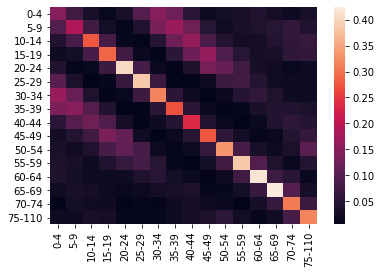

In [51]:
df = p_mixing_matrices['P_CONTACT_MATRIX_HOUSEHOLD']
df = df.astype(float)
df.columns = age_str
df.index = age_str
sns.heatmap(df)

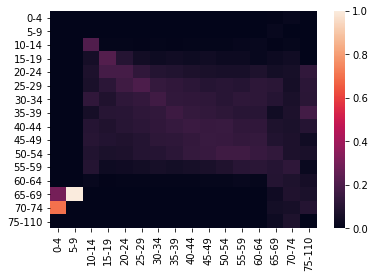

In [52]:
df = p_mixing_matrices['P_CONTACT_MATRIX_WORKPLACE']
df = df.astype(float)
df.columns = age_str
df.index = age_str
sns.heatmap(df)

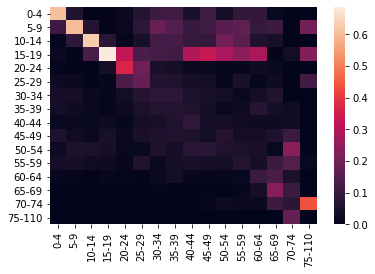

In [53]:
df = p_mixing_matrices['P_CONTACT_MATRIX_SCHOOL']
df = df.astype(float)
df.columns = age_str
df.index = age_str
sns.heatmap(df)

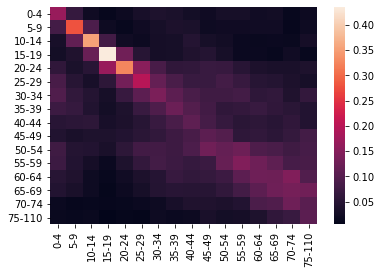

In [54]:
df = p_mixing_matrices['P_CONTACT_MATRIX_OTHER']
df = df.astype(float)
df.columns = age_str
df.index = age_str
sns.heatmap(df)

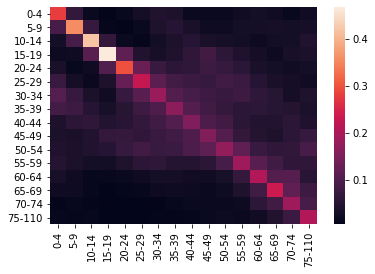

In [55]:
df = p_mixing_matrices['P_CONTACT_MATRIX_ALL']
df = df.astype(float)
df.columns = age_str
df.index = age_str
sns.heatmap(df)

In [56]:
SECONDS_PER_MINUTE = 60  

Data source: cite COVI-AgentSim project

In [57]:
mean_duration_matrix = [
    [154, 111, 110, 50, 134, 239, 254, 169, 77, 38, 20, 11, 12, 9, 14, 1],
    [112, 201, 102, 75, 45, 124, 175, 196, 139, 64, 31, 21, 20, 9, 10, 3],
    [103, 95, 213, 129, 41, 46, 103, 155, 157, 102, 52, 26, 19, 12, 11, 2],
    [50, 74, 132, 223, 62, 28, 33, 52, 78, 80, 48, 21, 9, 6, 5, 3],
    [135, 47, 45, 73, 109, 72, 50, 42, 60, 71, 64, 37, 17, 9, 6, 4],
    [242, 127, 51, 35, 79, 160, 93, 57, 55, 50, 51, 40, 19, 9, 6, 3],
    [254, 175, 104, 36, 47, 88, 160, 92, 66, 50, 43, 36, 19, 9, 6, 5],
    [170, 197, 157, 60, 38, 49, 90, 156, 90, 58, 47, 33, 21, 12, 8, 4],
    [76, 137, 156, 95, 48, 45, 55, 90, 146, 94, 51, 36, 19, 11, 7, 5],
    [38, 63, 102, 92, 64, 47, 49, 58, 92, 153, 81, 42, 20, 11, 8, 7],
    [20, 33, 55, 55, 59, 47, 49, 50, 64, 94, 163, 73, 29, 16, 9, 6],
    [12, 23, 30, 37, 43, 46, 50, 46, 52, 73, 90, 150, 64, 22, 15, 6],
    [15, 26, 28, 22, 30, 34, 38, 37, 40, 42, 48, 99, 157, 85, 18, 9],
    [12, 13, 17, 21, 25, 20, 25, 30, 33, 32, 34, 39, 103, 180, 103, 35],
    [18, 17, 18, 19, 18, 16, 23, 20, 30, 44, 24, 28, 41, 103, 222, 102],
    [3, 4, 4, 14, 10, 10, 13, 18, 22, 26, 18, 21, 15, 39, 141, 173]
    ]

mean_minus_95_ci_matrix = [
    [93.215, 70.15100000000001, 54.165, 0.102, 72.197, 177.30200000000002, 182.326, 104.235, 17.137999999999998, 0.88, 0.73, 0.51, 0.53, 0.42, 0.48, 0.33],
    [70.154, 121.28200000000001, 31.173000000000002, 21.128, 2.87, 72.167, 120.23, 136.256, 82.197, 17.112000000000002, 0.77, 0.55, 0.55, 0.36, 0.4, 0.28],
    [63.144, 34.156, 98.32799999999999, 73.185, 0.83, 10.82, 56.148999999999994, 101.209, 103.211, 54.15, 7.98, 0.57, 0.52, 0.38, 0.4, 0.25],
    [0.10300000000000001, 18.13, 71.193, 180.265, 43.181000000000004, 18.37, 25.41, 39.66, 61.96, 60.1, 35.6, 15.28, 6.12, 3.9, 3.6, 2.5],
    [69.202, 0.93, 0.95, 50.97, 83.134, 52.91, 37.62, 33.51, 45.75, 51.9, 46.81, 28.46, 11.23, 5.14, 3.9, 2.6],
    [175.308, 69.185, 9.92, 22.47, 60.98, 133.186, 76.11, 47.67, 39.7, 40.6, 40.63, 31.48, 14.25, 5.12, 3.8, 2.5],
    [183.325, 121.229, 55.153, 24.48, 35.59, 72.104, 135.186, 76.108, 54.77, 40.59, 35.51, 27.46, 13.24, 6.13, 3.9, 1.9],
    [109.23100000000001, 139.254, 103.211, 46.74, 29.47, 38.6, 73.107, 134.17700000000002, 75.105, 48.69, 36.59, 26.4, 11.31, 6.17, 4.11, 3.5],
    [22.131, 85.19, 104.208, 72.119, 37.59, 34.56, 44.66, 75.10600000000001, 126.167, 76.111, 40.62, 29.43, 13.25, 6.16, 5.9, 2.8],
    [0.89, 12.114, 53.151, 72.112, 48.79, 37.56, 39.58, 47.69, 77.10600000000001, 129.17700000000002, 65.96, 33.51, 15.25, 6.15, 5.11, 2.11],
    [0.77, 0.83, 1.109, 41.69, 43.75, 37.58, 39.59, 40.61, 50.79, 76.112, 138.187, 56.89, 19.38, 7.25, 5.14, 2.1],
    [0.64, 0.68, 0.75, 25.48, 31.55, 35.57, 40.61, 37.54, 42.62, 55.91, 69.11, 123.176, 46.82, 11.33, 8.21, 2.1],
    [0.82, 0.85, 0.86, 11.34, 20.39, 22.45, 28.47, 29.46, 30.5, 31.53, 34.63, 76.12100000000001, 121.193, 57.113, 9.27, 5.12],
    [0.8, 0.7, 0.74, 9.32, 6.43, 13.27, 13.36, 21.39, 23.42, 20.43, 21.47, 20.58, 63.141999999999996, 136.22299999999998, 68.138, 17.53],
    [0.89, 0.79, 0.78, 9.29, 9.26, 9.23, 17.29, 13.27, 15.45, 23.65, 18.31, 14.42, 13.68, 60.145, 165.27900000000002, 59.145],
    [0.72, 0.61, 0.58, 9.18, 7.14, 7.14, 8.18, 8.28, 10.34, 19.33, 12.24, 0.43, 5.26, 19.6, 82.2, 120.226]
    ]

Data source: https://pubmed.ncbi.nlm.nih.gov/18801889/

In [58]:
mean_household_contact_minutes = 744
stddev_household_contact_minutes = 308

mean_school_contact_minutes = 227
stddev_school_contact_minutes = 160

mean_workplace_contact_minutes = 184
stddev_workplace_contact_minutes = 149

mean_other_contact_minutes = 59
stddev_other_contact_minutes = 58

Data source: https://www.researchgate.net/publication/228649013_Mixing_patterns_between_age_groups_in_social_networks

In [59]:
country = {'MEAN_DURATION_MATRIX': mean_duration_matrix,
           'MEAN_MINUS_95_CI_MATRIX': mean_minus_95_ci_matrix,
           'MEAN_HOUSEHOLD_CONTACT_MINUTES': mean_household_contact_minutes,
           'STDDEV_HOUSEHOLD_CONTACT_MINUTES': stddev_household_contact_minutes,
           'MEAN_SCHOOL_CONTACT_MINUTES': mean_school_contact_minutes,
           'STDDEV_SCHOOL_CONTACT_MINUTES': stddev_school_contact_minutes,
           'MEAN_WORKPLACE_CONTACT_SECONDS': mean_workplace_contact_minutes * SECONDS_PER_MINUTE,
           'STDDEV_WORKPLACE_CONTACT_SECONDS': stddev_workplace_contact_minutes * SECONDS_PER_MINUTE,
           'MEAN_WORKPLACE_CONTACT_MINUTES': mean_workplace_contact_minutes,
           'STDDEV_WORKPLACE_CONTACT_MINUTES': stddev_workplace_contact_minutes,
           'MEAN_OTHER_CONTACT_MINUTES': mean_other_contact_minutes,
           'STDDEV_OTHER_CONTACT_MINUTES': stddev_other_contact_minutes,
          }

duration_matrices = covicontact.duration(country, SECONDS_PER_MINUTE)
duration_matrices.keys()

dict_keys(['CONTACT_DURATION_GAMMA_SCALE_MATRIX', 'CONTACT_DURATION_GAMMA_SHAPE_MATRIX', 'CONTACT_DURATION_NORMAL_MEAN_MATRIX', 'CONTACT_DURATION_NORMAL_SIGMA_MATRIX', 'HOUSEHOLD_CONTACT_DURATION_NORMAL_MEAN_MATRIX', 'HOUSEHOLD_CONTACT_DURATION_NORMAL_SIGMA_MATRIX', 'SCHOOL_CONTACT_DURATION_NORMAL_MEAN_MATRIX', 'SCHOOL_CONTACT_DURATION_NORMAL_SIGMA_MATRIX', 'WORKPLACE_CONTACT_DURATION_NORMAL_MEAN_MATRIX', 'WORKPLACE_CONTACT_DURATION_NORMAL_SIGMA_MATRIX', 'OTHER_CONTACT_DURATION_NORMAL_MEAN_MATRIX', 'OTHER_CONTACT_DURATION_NORMAL_SIGMA_MATRIX'])

Data source: cite COVI-AgentSim project

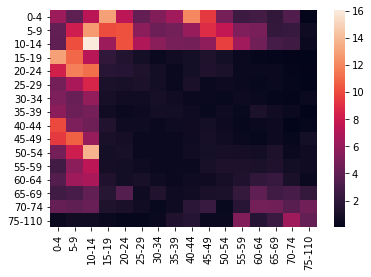

In [60]:
df = duration_matrices['CONTACT_DURATION_GAMMA_SCALE_MATRIX']
df = df.astype(float)
df.columns = age_str
df.index = age_str
sns.heatmap(df)

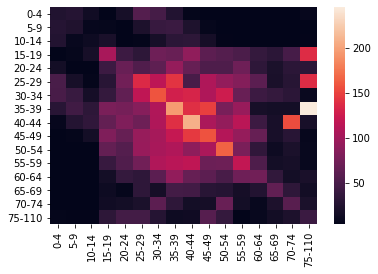

In [61]:
df = duration_matrices['CONTACT_DURATION_GAMMA_SHAPE_MATRIX']
df = df.astype(float)
df.columns = age_str
df.index = age_str
sns.heatmap(df)

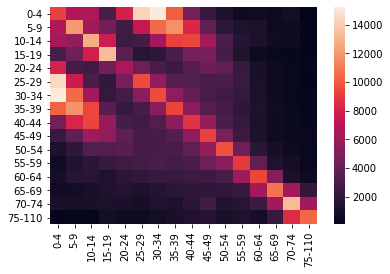

In [62]:
df = duration_matrices['CONTACT_DURATION_NORMAL_MEAN_MATRIX']
df = df.astype(float)
df.columns = age_str
df.index = age_str
sns.heatmap(df)

## Write parameters to a file

In [63]:
contact_matrices = {}

for var_name, matrix_df in p_mixing_matrices.items():
  matrix_list = [data.tolist() for _, data in matrix_df.iterrows()]
  contact_matrices[var_name] = matrix_list

for var_name, matrix_df in duration_matrices.items():
  matrix_list = [data.tolist() for _, data in matrix_df.iterrows()]
  contact_matrices[var_name] = matrix_list

In [64]:
param_list = [var_name for var_name in dir() if var_name.isupper() or var_name == 'P_COLLECTIVE_75_above']
param_list, \
contact_matrices.keys()

(['AGE_DIFFERENCE_BETWEEN_PARENT_AND_KID',
  'AVERAGE_AGE_REGION',
  'AVERAGE_N_EMPLOYEES_PER_MISC',
  'AVERAGE_N_EMPLOYEES_PER_STORE',
  'AVERAGE_N_EMPLOYEES_PER_WORKPLACE',
  'AVG_HOUSEHOLD_SIZE',
  'A_1',
  'A_2',
  'A_3',
  'A_4',
  'A_5',
  'B_1',
  'B_2',
  'C_1',
  'C_2',
  'C_2_1',
  'C_2_2',
  'C_3',
  'C_3_1',
  'C_3_2',
  'C_4',
  'C_4_1',
  'C_4_2',
  'C_4_3',
  'C_5',
  'C_5_1',
  'C_5_2',
  'D_1',
  'D_2',
  'D_3',
  'D_4',
  'D_5',
  'E',
  'E_1',
  'E_2',
  'E_3',
  'F_1',
  'GM_2',
  'GM_2_1',
  'GM_2_2',
  'GM_2_3',
  'GM_2_4',
  'GS_2',
  'GS_2_1',
  'GS_2_2',
  'GS_2_3',
  'GS_2_4',
  'G_1',
  'G_2',
  'G_2_1',
  'G_2_2',
  'G_2_3',
  'G_2_4',
  'HOSPITAL_BEDS_OCCUPANCY',
  'HOSPITAL_BEDS_PER_1K_PEOPOLE',
  'HOSPITAL_MEAN_DAILY_INTERACTIONS',
  'HOUSEHOLD_MEAN_DAILY_INTERACTIONS',
  'H_1',
  'H_2',
  'H_3',
  'H_4',
  'H_5',
  'H_6',
  'H_9',
  'ICU_BEDS_OCCUPANCY',
  'ICU_BEDS_PER_1K_PEOPLE',
  'I_1',
  'I_2',
  'MAX_AGE_CHILDREN',
  'MAX_AGE_CHILDREN_WITHOUT_PAREN

In [65]:
param_dict = {}
for param_name in param_list:
  param_dict[param_name] = locals()[param_name]

id = hex(random.getrandbits(128))
file_name = f'kingston_{id}.yml'
file_name

with open(file_name, 'w') as param_file:
    yaml.dump(param_dict, param_file)
    yaml.dump(contact_matrices, param_file)

file_name

'kingston_0x396f1204864b83cffd07a27bd4a0f5e3.yml'